In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [4]:
df = pd.read_csv('./loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["Gender"]=df["Gender"].fillna(method="ffill")
df["Married"]=df["Married"].fillna(value="Yes")
df["Dependents"]=df["Dependents"].fillna(value= 0)
df['Self_Employed']=df['Self_Employed'].fillna('No')
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(method="backfill")

C:\Users\rajve\AppData\Local\Temp\ipykernel_13576\3566742019.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Gender"]=df["Gender"].fillna(method="ffill")
C:\Users\rajve\AppData\Local\Temp\ipykernel_13576\3566742019.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Credit_History']=df['Credit_History'].fillna(method="backfill")


In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
cols=['LoanAmount','ApplicantIncome', 'CoapplicantIncome' ,'Loan_Amount_Term', 'Credit_History']
X = df[cols]
y = df['Loan_Status'].values
X , y

(     LoanAmount  ApplicantIncome  CoapplicantIncome  Loan_Amount_Term  \
 0    146.412162             5849                0.0             360.0   
 1    128.000000             4583             1508.0             360.0   
 2     66.000000             3000                0.0             360.0   
 3    120.000000             2583             2358.0             360.0   
 4    141.000000             6000                0.0             360.0   
 ..          ...              ...                ...               ...   
 609   71.000000             2900                0.0             360.0   
 610   40.000000             4106                0.0             180.0   
 611  253.000000             8072              240.0             360.0   
 612  187.000000             7583                0.0             360.0   
 613  133.000000             4583                0.0             360.0   
 
      Credit_History  
 0               1.0  
 1               1.0  
 2               1.0  
 3               1

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test = train_test_split(X, y, test_size=0.2 , random_state=42)


In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='elasticnet', max_iter=1000, C=101 , solver='saga', l1_ratio=1)
lr.fit(X_train, Y_train)

d:\MLwork\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=101, l1_ratio=1, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [35]:
Y_pred = lr.predict(X_test)
Y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

<Figure size 600x600 with 0 Axes>

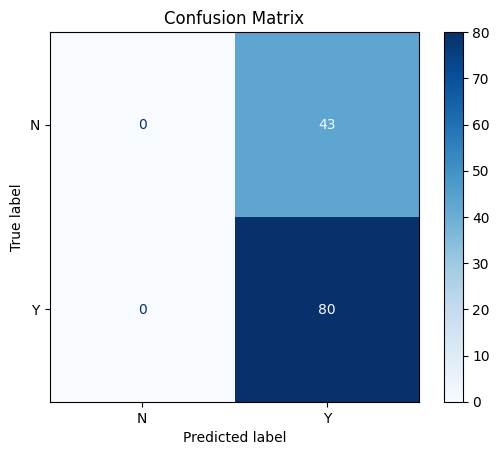

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    # Confusion matrixY_test
cm = confusion_matrix(Y_test, Y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

    # Plot confusion matrix
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred ))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        43
           Y       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



d:\MLwork\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MLwork\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MLwork\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr , X_train , Y_train , cv= 5)
print('Cross-validation Accuracy Scores', scores)
scores = pd.Series(scores)

scores.min(), scores.mean() , scores.max()

Cross-validation Accuracy Scores [0.6969697  0.69387755 0.68367347 0.69387755 0.70408163]


d:\MLwork\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MLwork\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MLwork\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MLwork\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\MLwork\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(0.6836734693877551, 0.6944959802102659, 0.7040816326530612)